# Predicting Prices of Houses in King County, Washington

This project intends to apply EDA to explore patterns, correlations in data and to apply ML techiniques to identify and rank models that predict the prices correctly in King County, Washington. 

Two data sets are used :
1. king_county data set from kaggle 
2. zipcodes with population data from king county website.

Data Source :  
    [king_county price data](https://www.kaggle.com/harlfoxem/housesalesprediction)  
    [zipcodes_popln data](https://www.zip-codes.com/county/wa-king.asp)

In [807]:
### Importing Data

#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [746]:
king_county = pd.read_csv("kc_house_data.csv") #Read king county data

In [747]:
popln = pd.read_csv("zicode_pop.csv") #Read zipcodes data

In [748]:
print("The king county data has " + str(king_county.shape[0]) + " rows and " + str(king_county.shape[1]) + " columns.")
print("Similarly, the zipcodes population data has " + str(popln.shape[0]) + " rows and " + str(popln.shape[1]) + " columns.")

The king county data has 21613 rows and 21 columns.
Similarly, the zipcodes population data has 120 rows and 6 columns.


**Metadata :**  

- Description Id : Unique ID for each home sold 
- Date: Date of the home sale 
- Price: Price of each home sold 
- Bedrooms: Number of bedrooms 
- Bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower 
- Sqft_living: Square footage of the apartments interior living space 
- Sqft_lot: Square footage of the land space 
- Floors: Number of floors 
- Waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not 
- View: An index from 0 to 4 of how good the view of the property was 
- Condition: An index from 1 to 5 on the condition of the apartment
- Grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11- 13 have a high quality level of construction and design 
- Sqft_above: The square footage of the interior housing space that is above ground level 
- Sqft_basement: The square footage of the interior housing space that is below ground level
- Yr_built: The year the house was initially built 
- Yr_renovated: The year of the house’s last renovation 
- Zipcode: What zipcode area the house is in 
- Lat Lattitude 
- Long Longitude 
- Sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
- Sqft_lot15: The square footage of the land lots of the nearest 15 neighbors

### Data Wrangling

In [749]:
# Observing King County Data
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [750]:
popln.head()

,zipcode,Classification,City,Population,Timezone,Area Code(s)
0,98001,General,Auburn,31911,Pacific,253
1,98002,General,Auburn,31647,Pacific,253
2,98003,General,Federal Way,44151,Pacific,253
3,98004,General,Bellevue,27946,Pacific,425
4,98005,General,Bellevue,17714,Pacific,425


On viewing the information about the two data sets below, it is seen that all variables have correct data types and no transformation is needed to fix them.

In [751]:
#Summaries:
king_county.info() 
popln.info() #correct data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB
<class 'pandas.core

In [752]:
king_county.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [753]:
popln.nunique()

zipcode           120
Classification      3
City               32
Population         81
Timezone            1
Area Code(s)       13
dtype: int64

In [754]:
king_county.isnull().sum() # no null values in king county data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [562]:
popln.isnull().sum() #no nulls in zipcodes data

zipcode           0
Classification    0
City              0
Population        0
Timezone          0
Area Code(s)      0
dtype: int64

For better analysis, year renovated variable is not consisted. Hence whenever an year of renovation is mentioned for a property, the variable is set to 1, else its 0.

In [756]:
king_county['yr_renovated'] = np.where(king_county['yr_renovated'] != 0, 1, king_county['yr_renovated'])
king_county.head() #replace year by 1, if property is renovated, else 0.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The two data sets are merged on the zipcode variable, which in turn returns a data set of 26 variables.
The newly joined data is further cleaned, by dropping redundant variables and transforming variable names and so on.

In [755]:
#Merge the two data sets
housing_df = pd.merge(king_county, popln, on="zipcode", how ="left")
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 26 columns):
id                21613 non-null int64
date              21613 non-null object
price             21613 non-null float64
bedrooms          21613 non-null int64
bathrooms         21613 non-null float64
sqft_living       21613 non-null int64
sqft_lot          21613 non-null int64
floors            21613 non-null float64
waterfront        21613 non-null int64
view              21613 non-null int64
condition         21613 non-null int64
grade             21613 non-null int64
sqft_above        21613 non-null int64
sqft_basement     21613 non-null int64
yr_built          21613 non-null int64
yr_renovated      21613 non-null int64
zipcode           21613 non-null int64
lat               21613 non-null float64
long              21613 non-null float64
sqft_living15     21613 non-null int64
sqft_lot15        21613 non-null int64
Classification    21613 non-null object
City              216

In [757]:
#Dropping irrelevant columns
housing_df = housing_df.drop(['id', 'date', 'lat','long', 'Classification','Timezone', 'Area Code(s)'], axis=1)

In [758]:
housing_df.columns=map(str. capitalize, housing_df.columns) #Capitalize header names for columns

### Exploratory Data Analysis

##### Interesting insights from preliminary summary of variables:

    1. There are 120 unique zipcodes
    2. The mean price of houses is $540088. The median price of houses is $450000.
      Usually median is a better indicator in prices.
    3. The average area of the interior living space is 2079 square feet.
    4. Out of 21613 houses, only 163 have waterfront views. Hence waterfront doesnt seem to be an important predictor in predicting the prices of the houses.
    5. Most of the houses on market are built in year 2005 and onwards
    6. Seattle is the most populous in comparion with other cities in King County,followed by Renton, Kent and Redmond.

In [759]:
housing_df["Price"].describe().apply(lambda x: format(x, 'f'))

count      21613.000000
mean      540088.141767
std       367127.196483
min        75000.000000
25%       321950.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: Price, dtype: object

In [760]:
housing_df["Sqft_living"].describe().apply(lambda x: format(x, 'f'))

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: Sqft_living, dtype: object

In [761]:
housing_df["Waterfront"].value_counts()

0    21450
1      163
Name: Waterfront, dtype: int64

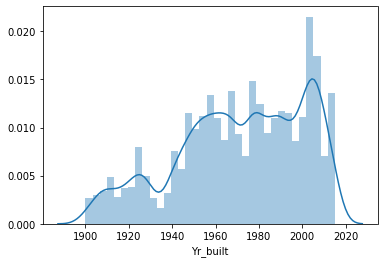

In [762]:
sns.distplot(housing_df["Yr_built"]);

In [763]:
city_pop = housing_df.groupby(['City'])["Population"].apply(lambda x:x.sum()).reset_index()
city_pop

,City,Population
0,Auburn,31824951
1,Bellevue,40361768
2,Black Diamond,502500
3,Bothell,5696340
4,Carnation,838860
5,Duvall,2037750
6,Enumclaw,4910958
7,Fall City,457650
8,Federal Way,36069770
9,Issaquah,18585800


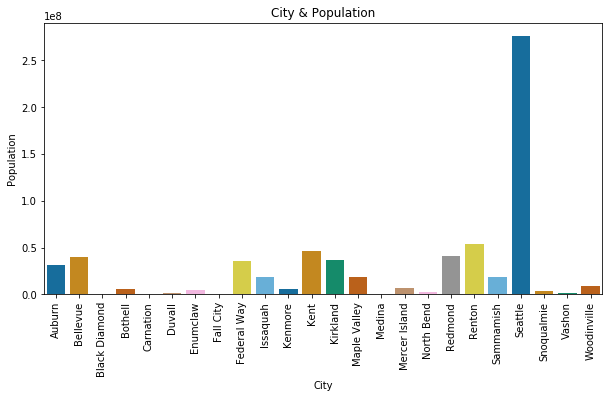

In [764]:
plt.figure(figsize=(10,5))
plt.title("City & Population")
chart = sns.barplot(x="City", y = "Population", data=city_pop, palette = "colorblind")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

To understand how the features in housing_df are correlated with the target variable price, a correlation matrix is plotted.

Price has the highest correlation with :
1. Sqft_living15
2. sqft_living 
3. grade
4. sqft_above
5. bathrooms

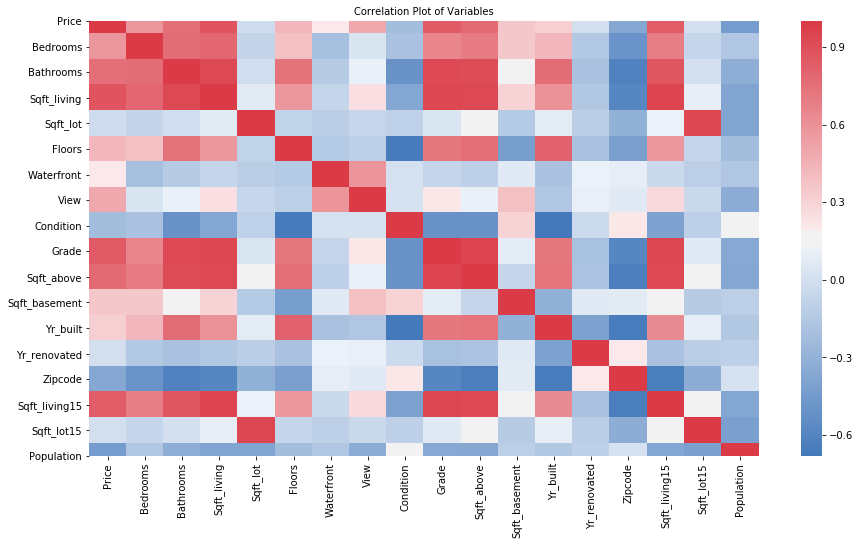

In [765]:
plt.figure(figsize=(15,8))
plt.title('Correlation Plot of Variables', fontsize=10)
colormap= sns.diverging_palette(250, 10, as_cmap = True)
sns.heatmap(housing_df.corr().astype(float).corr(),vmax=1.0, cmap = colormap)
plt.show()

First data is classified as reponse and target variables and is then further split into train & test data. Visualizations are done on Train data.

In [766]:
X = housing_df.drop(['Price', 'City'], axis=1) 

In [767]:
y = housing_df[['Price']]

In [768]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [769]:
X_test.shape

(5404, 17)

In [770]:
y_test.shape

(5404, 1)

#### Insights from Square Feet Area :

1. The distribution is right skewed for sqft_living with the mean being bigger than median. The mode is lower than median & mean. Most of the houses have a living area of ~2000 Sqft.
2. All other distributions apart from sqft_living are also right skewed
3. Th mean area of basement particually is very low (290 sqft) and the median is 0, implying all the values lie below the 50th percentile.
4. The median area of the sqft above the ground level is 7620 sqft.

In [771]:
X_train["Sqft_living"].mode()

0    1010
dtype: int64

In [772]:
X_train["Sqft_basement"].mean()
X_train["Sqft_basement"].median()

0.0

In [773]:
X_train["Sqft_lot"].median()

7620.0

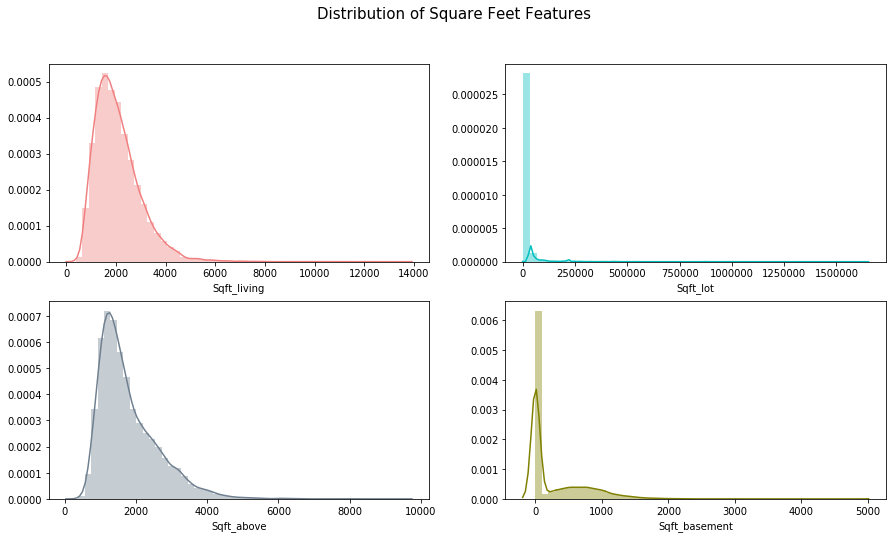

In [774]:
#Visuzalizations for EDA
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
sns.distplot(X_train["Sqft_living"], color = "lightcoral", ax=ax[0,0])
sns.distplot(X_train["Sqft_lot"],color = "c", ax=ax[0,1])
sns.distplot(X_train["Sqft_above"], color = "slategray", ax=ax[1,0])
sns.distplot(X_train["Sqft_basement"],color = "olive", ax=ax[1,1])
fig.suptitle('Distribution of Square Feet Features', fontsize=15);

#### Insights from Discrete Variables :

1. Most of the available properties have 4 bedrooms, followed by 3 and then 2 bedrooms. 5 bedrooms are sparse compared to the above types.
2. Single floor houses are maximum, with the next maximum count belonging to 2 floors.
2. View is not an important predictor because almost all the properties have no views.
4. Most of the properties have an average state of maintenance/condition ie 3 & 4.
5. Majority of the houses have above average quality construction as depicted by the max count in grade 7,followed by 8,9. Higher the grade better the construction.

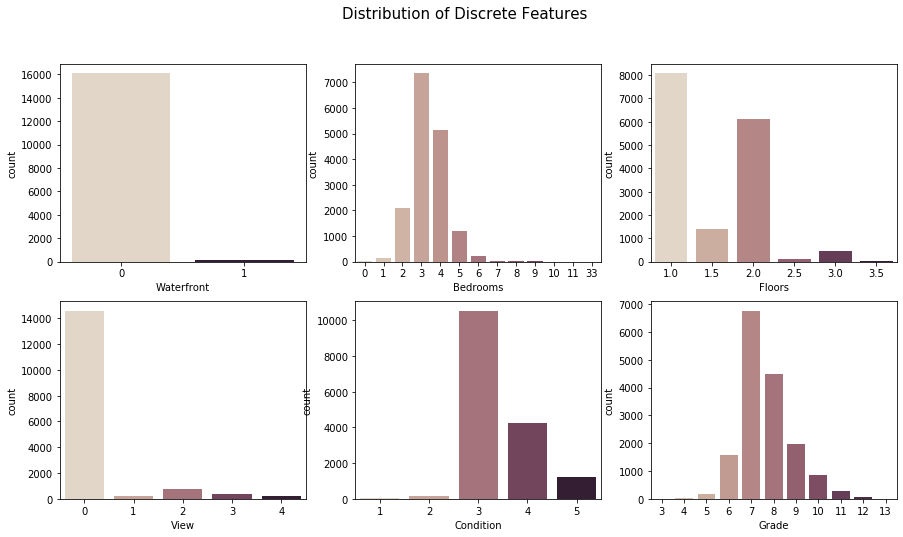

In [775]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
sns.catplot(x="Waterfront", kind = "count", palette=("ch:.25"), data=X_train,ax=ax[0,0])
sns.catplot(x="Bedrooms", kind="count", palette="ch:.25", data=X_train,ax=ax[0,1])
sns.catplot(x="Floors", kind="count", palette="ch:.25", data=X_train,ax=ax[0,2])
sns.catplot(x="View", kind = "count", palette="ch:.25", data=X_train,ax=ax[1,0])
sns.catplot(x="Condition", kind = "count", palette="ch:.25", data=X_train,ax=ax[1,1])
sns.catplot(x="Grade", kind = "count", palette="ch:.25", data=X_train,ax=ax[1,2])
fig.suptitle('Distribution of Discrete Features', fontsize=15);
for i in range(2,8): 
    plt.close(i)

The price distribution is right skewed, with majority of values osciallting around $450000

In [648]:
y_train["Price"].mode()

0    450000.0
dtype: float64

''

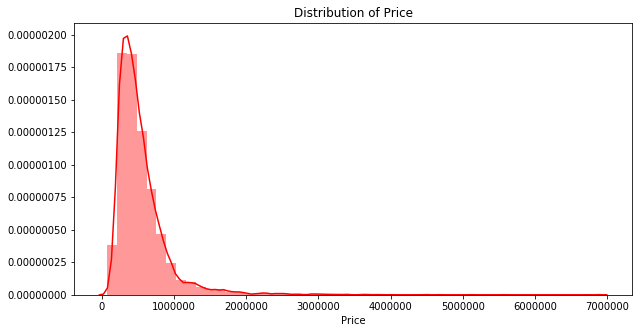

In [776]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Price')
sns.distplot(y_train["Price"], color="r")
;

#### Price Behavior

As seen, from the correlation matrix, price and square feet of living are correlated, which is confirmed by the plot below.

As the area increases, the price also increases, and even averagely maintained properties command higher prices are area increases.

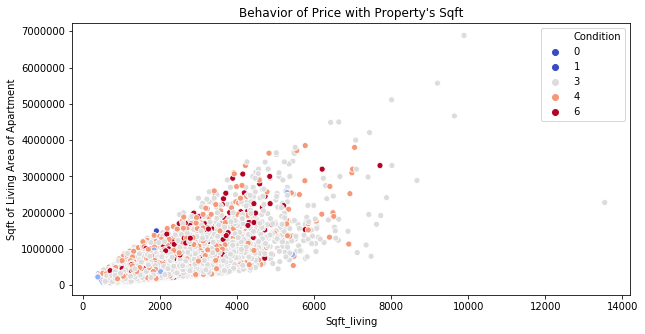

In [777]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_train['Sqft_living'],y=y_train["Price"],hue = X_train["Condition"], palette ="coolwarm")
plt.title("Behavior of Price with Property's Sqft")
plt.ylabel("Sqft of Living Area of Apartment");

On average large population resides in 98052,98023,98003,98103,98115

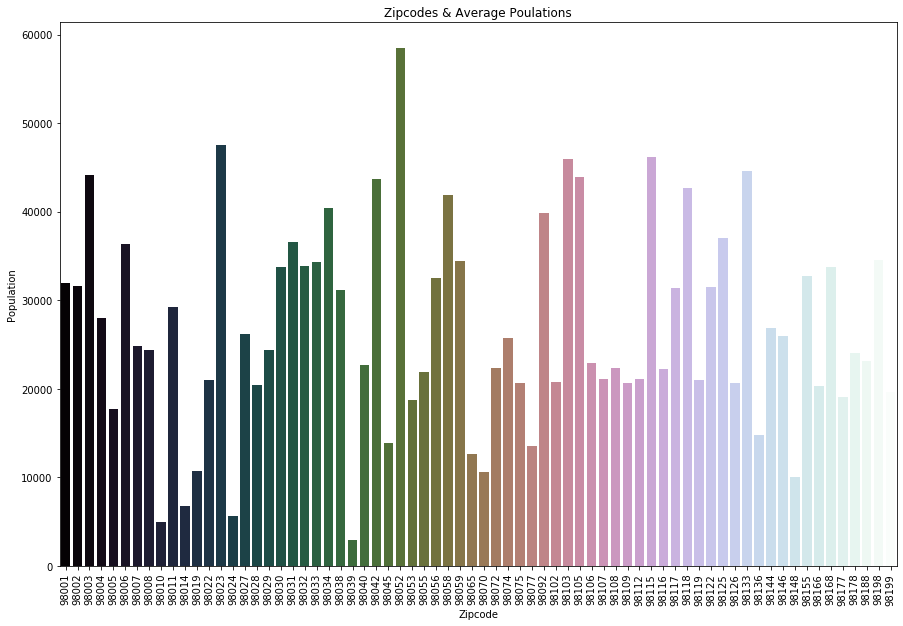

In [734]:
popl_zipcode = X_train.groupby('Zipcode', as_index=False).mean()[['Zipcode','Population']]
plt.figure(figsize=(15,10))
plt.title("Zipcodes & Average Poulations")
chart = sns.barplot(x='Zipcode', y='Population',data = popl_zipcode,palette = "cubehelix")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Model Building

#### Multiple Linear Regression

In [778]:
linearreg_model = LinearRegression(fit_intercept=True)
linearreg_model.fit(X_train, y_train) #Fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predicted_linearreg_model_test = linearreg_model.predict(X_test)

In [779]:
linearreg_model.score(X_test,y_test) # Testing the accuracy

The MLR model gives a score of 0.647, a model that gives a better score would be preferrable

#### Random Forest

In [794]:
rforest = RandomForestRegressor()

In [795]:
rforest.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [796]:
predicted_rf = rforest.predict(X_test)

In [797]:
rforest.score(X_test, y_test)

0.8071698772978585

Random forest gives a lot better score out of the two models, but random forests tend to overfit data, therefore we keep looking for better models

#### KNN - Unsupervised learning

The sqft living and area is also depicted for nearest 15 neighbors, hence KNN was implemented with K = 15

In [798]:
knn_model = KNeighborsRegressor(n_neighbors=15) #coz in square feet the nearest 15 neighbors
knn_model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

In [799]:
pred = knn_model.predict(X_test)

In [800]:
knn_model.score(X_test, y_test)

0.5778594008037019

The KNN model performs poorly in comparision to the previous models, and hence its not a preferance

#### Polynomial Regression - Non Linear

A polynomial regression is performed on all the variables in the response data, with degree two. Transformation is done to fit the data

In [802]:
polynomial_features= PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)

In [803]:
model_poly = LinearRegression() #fitting the model
model_poly.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [804]:
poly_pred = model_poly.predict(polynomial_features.fit_transform(X_test)) #Prediction on test
poly_pred

array([[ 349331.86106873],
       [ 305128.8681488 ],
       [ 345476.77112579],
       ...,
       [1267889.03687286],
       [ 626980.26680756],
       [ 406032.01708984]])

In [805]:
r2_score(y_test, poly_pred)

0.7529687621187948

The 2nd degree polynomial model performs the best out of all the models, and  hence it should be preferred to predict the prices in King County, WA state.

#### Conclusion :

Models ranked from Good to Bad - Polynomial Regression Model > Linear Regression Model > Random Forest > KNN